

---


## Tutorial do artigo:
## Training and Meta-Training Binary Neural Networks with Quantum Computing



### **Autores:**
Fawaz, Abdulah, et al.


---


### **Grupo que criou o resumo e tutorial:**
Leal, Daivid V. e Oliveira, Felipe V.


### **Problema:**

1. Encontrar um conjunto adequado de pesos para uma rede neural tornou-se um dos problemas mais estudados do aprendizado de máquina moderno.

2. É um desafio significativo aos cientistas da computação para os quais poucas alternativas bem-sucedidas estão disponíveis. Pode ser difícil explorar espaços de pesquisa muito grandes com eficiência e, pior, a otimização pode convergir para um mínimo local longe do ideal global.

3. Também é difícil entender o cenário das funções de custo, e escolher hiperparâmetros e projetar redes neurais permanece principalmente um processo manual.


### **Motivação:**

1. O aprendizado de máquina quântico visa encontrar uma vantagem na aplicação da computação quântica ao aprendizado de máquina.

2. Alguns algoritmos quânticos prometem uma revolução no aprendizado de máquina na teoricamente.

3. A principal vantagem dos qubits sobre os bits clássicos é sua capacidade de estar em superposições quânticas de estados.


### **Solução:**

A chave deste método é representar todos os parâmetros a serem investigados como qubits, que são então colocados em superposição e com isso aumentar a velocidade do processamento visto que as funções podem ser aplicadas de maneira paralela quando vários qubits estão em superposição.

### **Objetivo do Tutorial:**

* Neste tutorial, será apresentado como implementar um circuito quântico para que um computador quântico possa gerar um estado quântico que representa todo o cenário de custos para uma determinada rede neural e que o cenário completo da função de perda de uma rede neural pode ser representado como a saída do estado quântico por um computador quântico.

* Será apresentado como um computador quântico pode treinar uma rede neural binária manipulando os estados bom base na utilização de um algoritmo conhecido como amplificação de amplitude quântica.

Além disso, com pequenas adaptações, o método proposto também pode representar o cenário de meta-perdas de várias arquiteturas de redes neurais simultaneamente.



---


#  Conceitos básicos sobre computação quântica!

---

Bits quânticos, ou **qubits**, são a unidade fundamental da informação quântica, seus valores são manipulados aplicando **portas quânticas** a eles na forma de **circuitos quânticos**.

Abaixo podemos ver mais detalhes:

### Qubits:

  Eles **são fundamentalmente diferentes** dos bits clássicos. Enquanto os bits clássicos são completamente descritos como estando em um dos dois estados, **0 ou 1**, o **estado de um qubit** não pode ser completamente descrito por **apenas um único número.** Pode estar no estado 0, no estado 1 ou em uma superposição quântica de ambos.
  
  Matematicamente, o estado de um qubit é um vetor bidimensional com elementos complexos e uma norma unitária.
  
* ###  **Estado de um qubit:**

    Um estado puro qubit é uma superposição linear de dois estados. Isto significa que o qubit pode ser representado como uma combinação linear de ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/ed066a3ad158da0ad6d6a421a606b1c8a35eb95b) e ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/2f53021ca18e77477ee5bd3c1523e5830189ec5c):
    
 *    ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/aabd1ffc6a57b00e254e4c212d98ebbea6ccc7fc)
    
  Onde α e β são amplitudes probabilísticas e geralmente podem ser números complexos.

  Quando nós medimos este qubit, a probabilidade de resultar ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/ed066a3ad158da0ad6d6a421a606b1c8a35eb95b) é ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/fa34618537661f2d4d710cc26e8afe891f50f7b8) e a probabilidade de resultar ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/2f53021ca18e77477ee5bd3c1523e5830189ec5c) é ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4caecb560883af3b9c0c3a1d0e13aae75f121d0d). 

  Porque o quadrado das amplitudes é igual à soma das probabilidades, resulta que α e β podem ser determinados pela equação:
    
     * ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d20d10d081d09b9a34ad569a60545eee046f6b34)

  Simplesmente porque isto garante que você deve medir um estado ou outro.



### Portas Quânticas:

Tanto na **computação clássica** quanto na **quântica**, **portas** **manipulam os estados de bits e qubits**. Como **vetores complexos**, os estados qubit são **transformados** entre si aplicando matrizes complexas chamadas **operadores** ou simplesmente **portas quânticas.**

* Essa transformação segue as regras da **álgebra linear** e um estado:
$$|\Psi\rangle$$ É transformado em um **estado** diferente: $$|\Phi\rangle $$ por uma **porta** $$U$$ de acordo com a transformação **da matriz** $$|\Psi\rangle=U|\Phi\rangle$$

 Para manter o requisito estrito de uma norma de unidade, essas matrizes são restritas a serem **unitárias**.
 

### Portas mais utilizadas:
  * **Porta X (NOT):**

  A porta X **inverte** o estado de um qubit de **|1⟩ a |0⟩** e vice-versa. É representada pela matriz:

$$X=\begin{bmatrix}
0 & 1\\ 
1 & 0
\end{bmatrix} $$
  *  ***Porta Z:***
  
  A porta Z atua em um único qubit. Equivale a uma rotação em torno do eixo Z. Transforma um estado arbitrário α |0⟩ + β |1⟩ no estado α |0⟩ - β |1⟩.
$$Z=\begin{bmatrix}
1 & 0\\ 
0 & -1
\end{bmatrix} $$

* ***H (Hadamard)***

  A Porta Hadamard também não possui analógico clássico. É usado para transformar qubits do seu estado inicial:
  
  * **|0⟩** para o estado: ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b63c1aafd4f747ae34793680ae964fd73725efe8)
  
 * **|1⟩** para o estado: ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4e428aaf74b13b0709992efede12bfa92e06247c)

  A sua matriz é dada por:
  $$H=\frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1\\ 
1 & -1
\end{bmatrix}$$

* **CNOT (NOT Controlado ou cX)**
A porta CNOT pode ser vista como uma generalização da porta XOR clássica. Ele executa um gate NOT em um qubit de destino se um qubit de controle estiver no estado | 1⟩. 
$$CNOT=\begin{bmatrix}
1 & 0 & 0 & 0\\ 
0 & 1 & 0 & 0\\ 
0 & 0 & 0 & 1\\ 
0 & 0 & 1 & 0
\end{bmatrix}$$

---


#  Método Proposto

---

Com o propósito de representar todas as possibilidades possíveis para qualquer parâmetro escolhido como entrada da rede, os mesmos podem então ser configurados para uma superposição quântica aplicando uma única porta **Hadamard**.

Sendo assim, a saída do circuito seria, então, uma **superposição quântica** de todos os valores possíveis e seus respectivos resultados.

Podemos escrever isso como:

$$ \frac{1}{\sqrt{W}}\sum_{w\epsilon \mathbb{W}}^{ } \mid w\rangle \mid O_{w}\rangle $$

Onde $\mathbb{W}$ é o conjunto de todos os pesos binários possíveis, $W$ é seu tamanho e $O_{w}$ o resultado da rede neural, dado o conjunto de pesos $w$.

Sendo assim é possível ser gerado o **cenário de custos.**

> É possível observar quê, **se todo qubit que representa um peso** é definido como uma **superposição** de todos os seus valores possíveis, **todo o cenário de custos está contido** nesse estado quântico que foi gerado com apenas um único circuito quântico.



**Declaração do Problema:**

Classificação binária em três recursos binários, são descritos os dois problemas abaixo:

* Primeiro problema:
  
   $ y(x_{1}, x_{2}, x_{3})=sign(x_{3}x_{1} + x_{2})$
* Segundo problema:

  $ y(x_{1}, x_{2}, x_{3})=sign(x_{1} + x_{2} + x_{3})$

Ambos são uma classificação binária em três features binárias de oito pontos de dados correspondentes a cada $2^3$ arranjos dessas features.

A função $sign$ é definida como:
$$ sign(x)=\left\{\begin{matrix}
1, & \text{se } x \geqslant 0.\\ 
-1 & \text{caso contrario.}
\end{matrix}\right.$$

**A estrutura do BNN.** 

> ![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTx1rPGiYGmIGhhosBQ3J1h86zrbpfKW7WJPl-pZYALyJCB1dG4&s)

Sendo assim possuindo um total de oito pesos binários.



# **Hands On!**
Construindo uma Rede Neural Binária Quântica (QBNN)

Para o tutorial em questão iremos utilizar uma biblioteca chamada **qiskit**.

Com ela é possível realizar implementações, simulações e execuções de algortimos quânticos tudo escrito sobre a linguagem Python.

* Instalando a biblioteca
> pip install qiskit

Inicializando o qiskit e verificando os backends disponíveis.

In [1]:
## matplotlib to see the circuits
%matplotlib inline
## qiskit standart
from qiskit import *
import numpy as np
from random import randint

## See available eviroments
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

# **Passo FeedFoward da Rede**

**Representando valores numéricos:**

Os pesos binários **+1**, **-1** e os valores binários **+1**, **0** são representados pelos estados $ \mid 1\rangle $ e $\mid 0\rangle $ respectivamente. 

> Em um circuito quântico, por padrão, todos os qubits começam no estado $\mid 0\rangle$ e precisam apenas de uma aplicação de uma única porta **NOT** para ser definida como $\mid 1\rangle$, quando apropriado.


## **1. Entendendo as partes do Perceptron**

### 1.1 Multiplicando valores de entrada por pesos binários:

Dado um qubit representando um peso binário e outro qubit um valor binário, o último qubit pode ser ponderado pelo primeiro pelo uso de uma porta **anti-CNOT**. 

> Uma porta **anti-CNOT** aplica uma porta **NOT** a um qubit se o qubit de **controle** estiver no estado $ \mid 0\rangle $ em vez de $\mid 1\rangle $


Pode ser construído usando duas portas **NOT** e uma porta **CNOT**. 

*Observe o código abaixo:*


In [2]:
# Definindo a multiplicação de um peso por uma entrada.
def multiplyWeightInput(circuit, x, y):
    circuit.x(x)
    circuit.cx(x, y)
    circuit.x(x)

Especificamente, utilizamos o qubit de **peso** como **controle** e o **valor** que contém o qubit como **destino**.

Do qubit 0 ao qubit 2 do array temos os pesos e os demais são as entradas, logo:

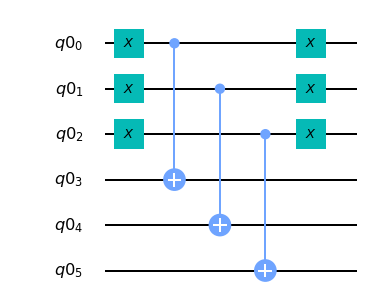

In [3]:
# Definindo um registrador quântico com 6 qubits
qWI = QuantumRegister(6)

# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI,)

# Definindo a quantidade de inputs da rede
qtd_input = 3

# Então, aqui temos a implementação de um perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

### 1.2 Criando a função de Ativação Majority para 3 entradas:

> Como a função de $ sign $ é altamente **não linear**, ela representa o maior desafio de traduzir para a linguagem linear da álgebra da mecânica quântica. 
Se restringirmos o problema apenas ao caso especial de argumentos binários, o função $ sign^{2} $ será reduzida para descobrir se existem **N/2** qubits fora de **N** no estado **|1⟩**. 

Isso pode ser conseguido através da construção de um análogo quântico de uma função de Ativação Majority clássica, substituindo portas **AND** por portas **CCNOT** e construindo portas **OR** a partir das portas **CNOT e NOT.** 

*Observe o código abaixo:*

In [4]:
# Essa função cria a majority definida para um perceptron com 3 entradas.
def activationFunction(circuit, listaQubit):
    circuit.ccx(listaQubit[0], listaQubit[1], listaQubit[3])
    circuit.ccx(listaQubit[1], listaQubit[2], listaQubit[3])
    circuit.ccx(listaQubit[0], listaQubit[2], listaQubit[3])

O número de portas necessárias é dimensionado, pois o coeficiente binomial **N** escolhe **N/2**. 

Na Figura abaixo é possível observar um neurônio de **três entradas** e sua implementação de **circuito quântico**.


![alt text](https://i.ibb.co/0fcMsHw/BNN1.png)

> O **neurônio** à esquerda corresponde ao circuito **quântico** à direita. Os circuitos quânticos são lidos da esquerda para a direita, assim como os circuitos de computação clássicos. As caixas representam operações em qubits. 

As **três** operações quânticas imitam os equivalentes clássicos: 

1. Os dados são inseridos primeiro, 
2. depois são ponderados pelos qubits de peso e, 
3. finalmente, alguma função de ativação é implementada. 

O símbolo final no canto inferior direito representa uma porta **CNOT** e armazena o resultado em um **qubit de saída dedicado**. (*Os qubits Ancilla são qubits adicionais 'necessários' para executar determinadas operações.*)

*O código abaixo mostra como executar as operações apresentadas acima:*

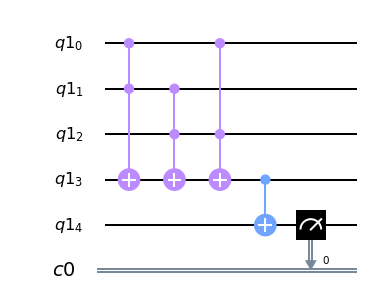

In [5]:
# Definindo um registrador quântico com 6 qubits
qWI = QuantumRegister(5) 

# Definindo um registrado para receber a saáda do circuito quântico
c = ClassicalRegister(1)

# Construindo o circuito
circuit = QuantumCircuit(qWI, c)

# Então, aqui temos a implementação de um perceptron com 3 entradas.
activationFunction(circuit, qWI[0:4])
circuit.cx(qWI[3], qWI[4])
circuit.measure(qWI[4], c[0])

# -----------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

#### 1.3 Exemplo da função majority

Veja a entrada |000>, devemos ter a saída 0.

In [6]:
backend = BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(circuit, backend,)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'0': 1024}


Veja a entrada |110>, devemos ter a saída 1.

In [8]:
qWI = QuantumRegister(5) 
c = ClassicalRegister(1)
circuit = QuantumCircuit(qWI, c)

circuit.x(qWI[0])
circuit.x(qWI[1])

# Então, aqui temos a implementação de um perceptron com 3 entradas.
activationFunction(circuit, qWI[0:5])
circuit.cx(qWI[3], qWI[4])
circuit.draw(output="mpl")

circuit.measure(qWI[4], c[0])

job = qiskit.execute(circuit, backend,)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'1': 1024}


### 2. O Perceptron
 
Neste exemplo temos entradas dos pesos como 0 e inputs como 0, é fácil ver que, de acordo com o circuito a saída deve ser 1.

#### 2.1 Criando o Perceptron

Criamos o perceptron utilizando as funções de multiplicação e a função de ativação.

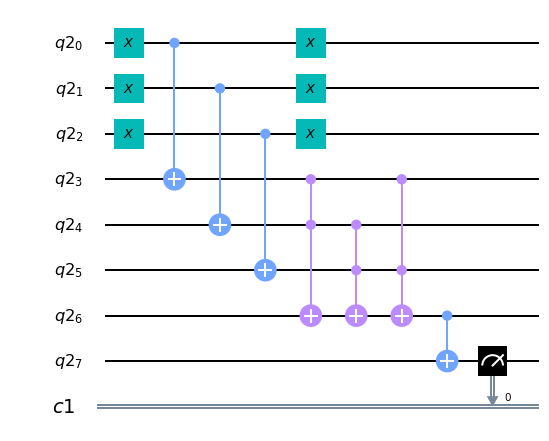

In [8]:
# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(8) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = QuantumCircuit(qWI, c)
# definindo a quantidade de inputs
qtd_input = 3
# Então, aqui temos a implementação de um perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
activationFunction(circuit, qWI[3:7])
circuit.cx(qWI[6], qWI[7])
circuit.measure(qWI[7], c[0])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

#### Executando o circuito

In [10]:
job = qiskit.execute(circuit, backend,)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'1': 1024}


#### Vejamos um segundo exemplo com pesos |000> e entradas |101>

É fácil perceber que a saída será: 0

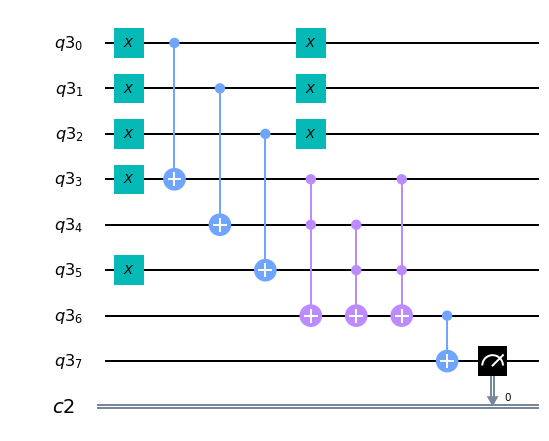

In [9]:
# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(8) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI, c)
# Definindo a quantidade de inputs
qtd_input = 3
# Mudando os inputs para que fique |101>
circuit.x(qWI[3])
circuit.x(qWI[5])
# Então, aqui temos a implementação de um perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
activationFunction(circuit, qWI[3:7])
circuit.cx(qWI[6], qWI[7])
circuit.measure(qWI[7], c[0])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

In [10]:
job = qiskit.execute(circuit, backend,)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'0': 1024}


#### Compreendendo o resultado

Pudemos perceber que se necessitamos alterar as entradas, basta utilizar o operador "X" nos bits que desejamos que sejam 1. Além disso é fácil verificar que a função majority explicada pelo autor do Artigo segue o segunte padrão:

Pesos |000> e seguintes inputs, temos:

Inputs * Pesos => Saída  
|000> * |000>  => 1  
|001> * |000>  => 1  
|010> * |000>  => 1  
|011> * |000>  => 0  
|100> * |000>  => 1  
|101> * |000>  => 0  
|110> * |000>  => 0  
|111> * |000>  => 0

Ao alterar os pesos, alteramos as saídas também.

### Vejamos a construção da Rede Neural

A rede neural é composta por dois neurônio de entrada e dois neurônios de saída.
Neste primeiro exemplo, criaremos a rede sem otimizar o circuito, ficará grande porém fidedigno ao esquema correto apresentado pelo artigo.

P.s. Existem várias maneiras de implementar este circuito!

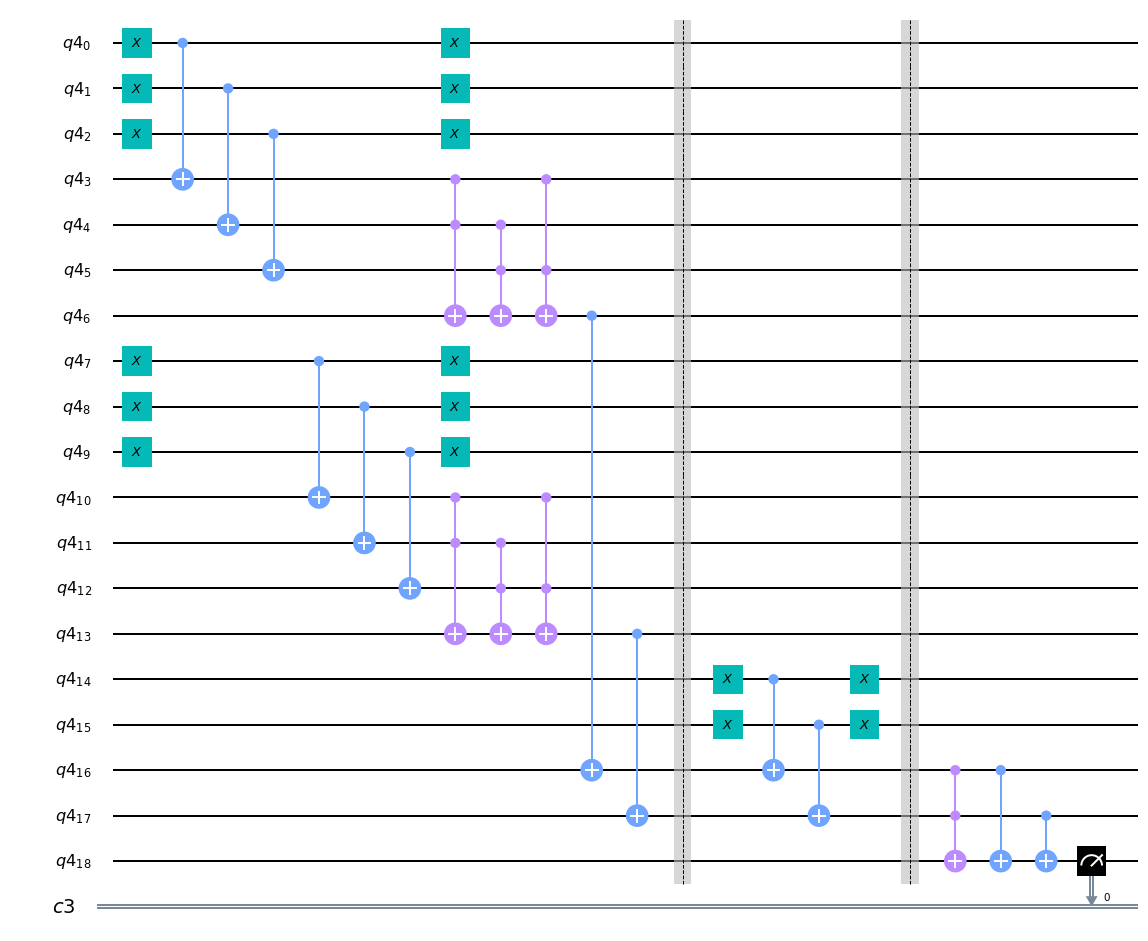

In [11]:
# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(19) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI, c)
# Definindo a quantidade de inputs
qtd_input = 3

# Então, aqui temos a implementação do primeiro perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]

# Vejamos o segundo perceptron que também tem 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(7, 10)]

activationFunction(circuit, qWI[3:7])
activationFunction(circuit, qWI[10:14])
circuit.cx(qWI[6], qWI[16])
circuit.cx(qWI[13], qWI[17])
circuit.barrier()

multiplyWeightInput(circuit, qWI[14], qWI[16])
multiplyWeightInput(circuit, qWI[15], qWI[17])
circuit.barrier()

circuit.ccx(qWI[16], qWI[17], qWI[18])
circuit.cx(qWI[16], qWI[18])
circuit.cx(qWI[17], qWI[18])

circuit.measure(qWI[18], c[0])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

In [12]:
job = qiskit.execute(circuit, backend,)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'0': 1024}


#### Pensando no melhoramento da performance do algoritmo, em questões de utilização de quBits.

Bem, acima temos o modelo que foi utilizado, e aos poucos vamos tentar reduzir a quantidade de quBits utilizandos para a contrução da Rede. Podemos perceber que a entrado do circuito para a rede, será sempre a mesma e que só precisamos reinicializar os quBits para o estado inicial da entrada, logo temos: 

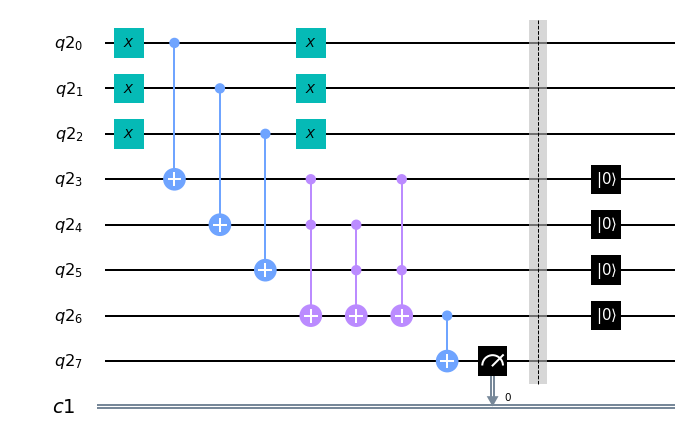

In [7]:
# Supondo que os valores iniciais são |0>
qWI = QuantumRegister(8) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = qiskit.QuantumCircuit(qWI, c)
# Definindo a quantidade de inputs
qtd_input = 3

# Então, aqui temos a implementação de um perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
activationFunction(circuit, qWI[3:7])
circuit.cx(qWI[6], qWI[7])
circuit.measure(qWI[7], c[0])
circuit.barrier()

circuit.reset(qWI[3:7])

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")

#### O que foi feito?
Com a função ".reset()" reinicializamos 4 quBits para seu estado original e podemos reutilizá-los ao invés de ter que utilizar novos quBits. Além disso, note que não resetamos o quBit com a saída do perceptron.

Em seguida temos.

Para 1 perceptron e seus respectivos pesos e entradas foram necessários somente 8 quBits contando com suas ancillas.
Vejamos então, como podemos reutilizar os quBits de entradas, os utilizados para a função de ativação e as ancillas.

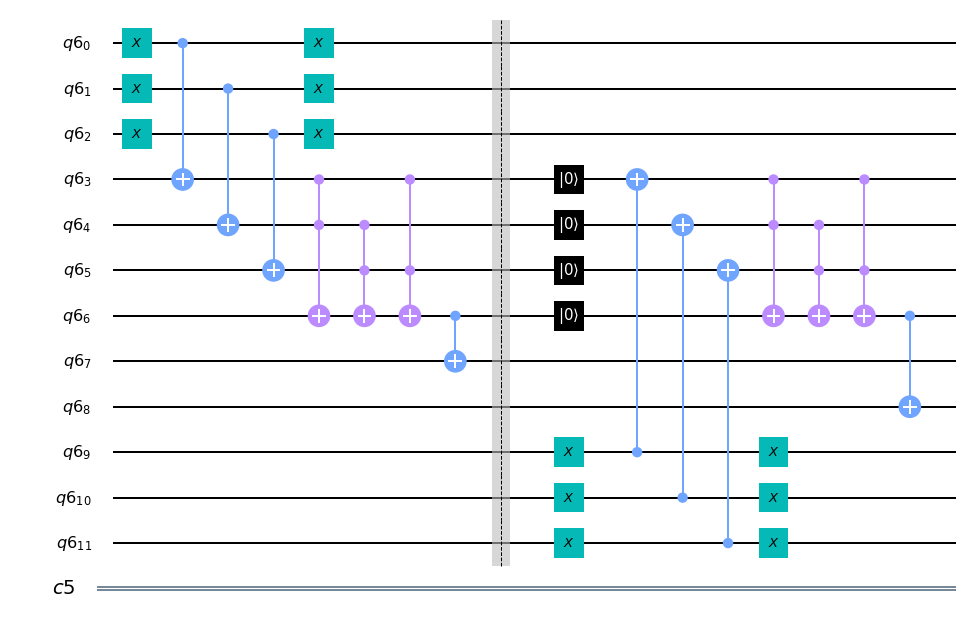

In [14]:
#### Supondo que os valores iniciais são |0>
qWI = QuantumRegister(12) 
c = ClassicalRegister(1)
# Construindo o circuito
circuit = QuantumCircuit(qWI, c)
# Definindo a quantidade de inputs
qtd_input = 3

# Então, aqui temos a implementação do primeiro perceptron com 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i + qtd_input]) for i in range(qtd_input)]
activationFunction(circuit, qWI[3:7])
circuit.cx(qWI[6], qWI[7])

circuit.barrier()

circuit.reset(qWI[3:7])

# Vejamos o segundo perceptron que também tem 3 entradas.
[multiplyWeightInput(circuit, qWI[i], qWI[i - qtd_input - 3]) for i in range(9, 12)]
activationFunction(circuit, qWI[3:7])
#circuit.barrier()
circuit.cx(qWI[6], qWI[8])
#circuit.barrier()

# -----------------------------------------
# Ver o circuit desenhado
circuit.draw(output="mpl")


#### Desse modo, conseguimos reutilizar 4 qubits e reduzir 4 neurônios.

E ao final, podemos utilizar os mesmo 4 quBits para obter a saída da rede, adicionando somente 2 qubits como pesos e 1 terceiro qubit, que será a nossa saída. A medição da saída precisará ser realizada, logo, em código completo temos:

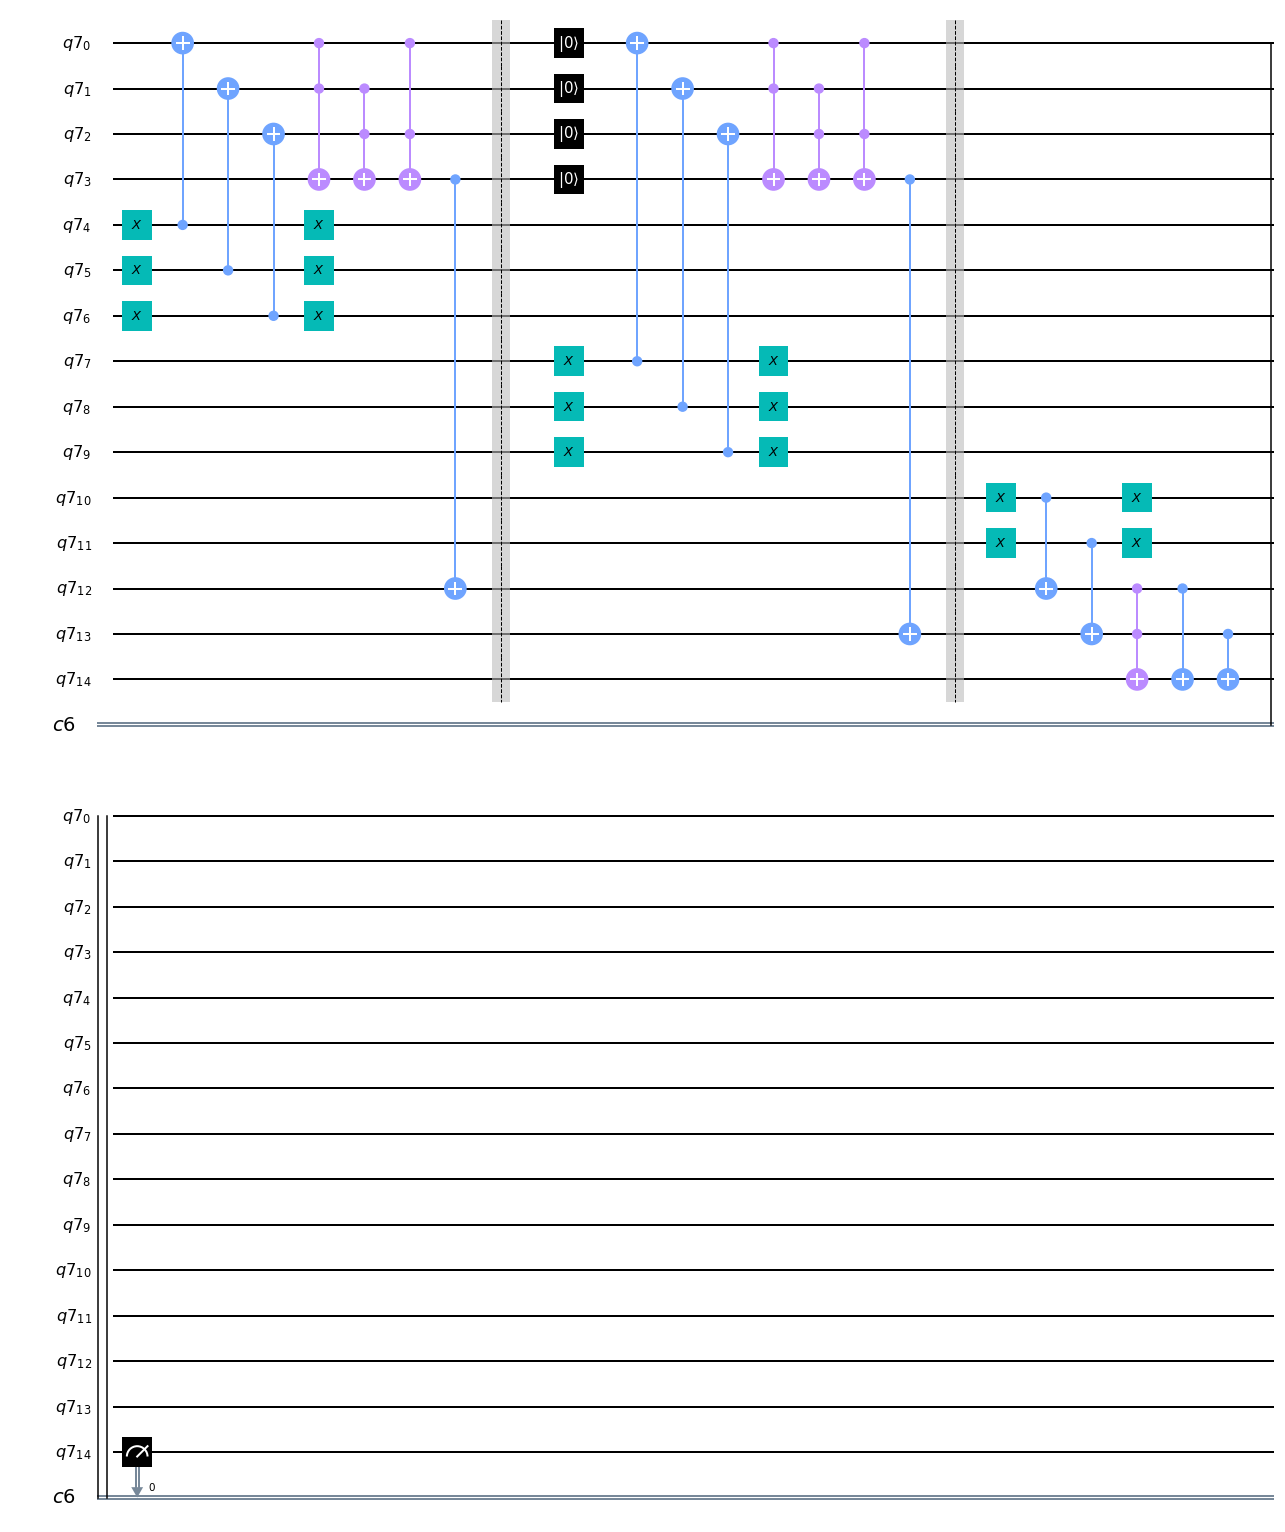

In [15]:
# Supondo que os valores iniciais são |0>
def createNeuralNetwork(circuit, qWI, c, qtdInputs):
    # Então, aqui temos a implementação do primeiro perceptron com 3 entradas.
    [multiplyWeightInput(circuit, qWI[i + qtd_input + 1], qWI[i]) for i in range(0, 3)]
    activationFunction(circuit, qWI[0:4])
    circuit.cx(qWI[3], qWI[12])
    circuit.barrier()
    circuit.reset(qWI[0:4])

    # Vejamos o segundo perceptron que também tem 3 entradas.
    [multiplyWeightInput(circuit, qWI[i + qtd_input + 4], qWI[i]) for i in range(0, 3)]
    activationFunction(circuit, qWI[0:4])
    circuit.cx(qWI[3], qWI[13])
    circuit.barrier()
    
    # modificando
    multiplyWeightInput(circuit, qWI[10], qWI[12])
    multiplyWeightInput(circuit, qWI[11], qWI[13])
    
    circuit.ccx(qWI[12], qWI[13], qWI[14])
    circuit.cx(qWI[12], qWI[14])
    circuit.cx(qWI[13], qWI[14])
    circuit.measure(qWI[14], c[0])

    # -----------------------------------------
    # Ver o circuit desenhado
    return circuit

qWI = QuantumRegister(15) 
c = ClassicalRegister(1)
circuit = QuantumCircuit(qWI, c)

neuralNetwork = createNeuralNetwork(circuit, qWI, c, 3)
neuralNetwork.draw(output="mpl")

#### Observe que algumas modificações foram feitas para que os nossos 3 primeiros qubit sejam as entradas da nossa rede, em seguida uma ancilas para a função de ativação, os 8 subsequentes sejam os pesos, os 2 subsequentes a saída de nossos 2 perceptrons e o último reutilizado sendo a saída da rede.

{'0': 1}


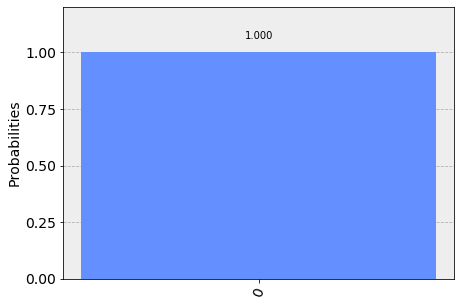

In [23]:
job = qiskit.execute(neuralNetwork, backend, shots = 1)
result = job.result()
counts = result.get_counts(neuralNetwork)
print(counts)
visualization.plot_histogram(counts)

#### Percebemos que:

- Fizemos pequenas alterações e uma mudança de pensamento simples e conseguimos reduzir a rede para a utilização de 15 qubits;
- Utilizando 15 quBits ao invés de 19 temos um ganho na redução de memória e processamento;

### Faremos um modificação na função que cria a o circuito da rede para que ela possa inicializar corretamente os valor dos inputs passados.

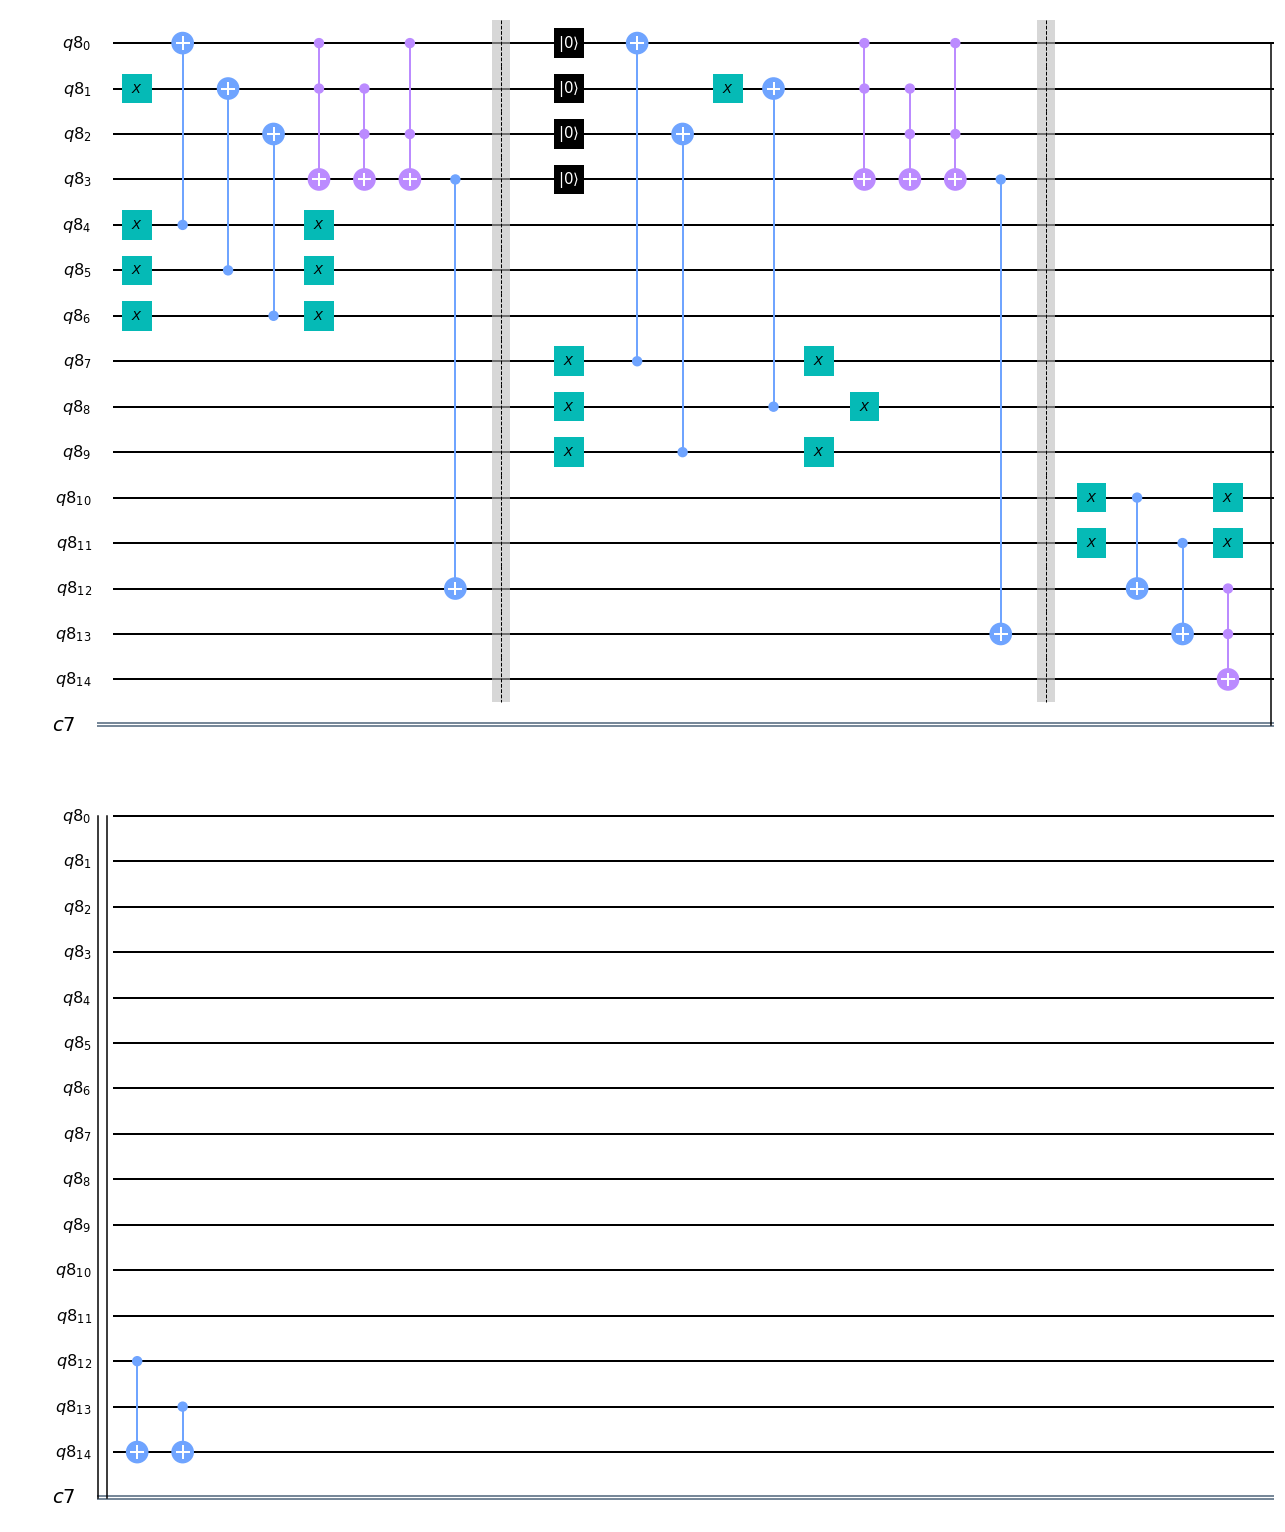

In [16]:
# Supondo que os valores iniciais são |0>
def createNeuralNetwork(circuit, qWI, c, qtdInputs, inputs):
    #inicializando os inputs
    for i in range(len(inputs)):
        if(inputs[i] == 1):
            circuit.x(qWI[i])
            
    # Aqui temos a implementação do primeiro perceptron com 3 entradas.
    [multiplyWeightInput(circuit, qWI[i + qtd_input + 1], qWI[i]) for i in range(0, 3)]
    activationFunction(circuit, qWI[0:4])
    circuit.cx(qWI[3], qWI[12])
    circuit.barrier()
    circuit.reset(qWI[0:4])
    
    #inicializando os inputs
    for i in range(len(inputs)):
        if(inputs[i] == 1):
            circuit.x(qWI[i])
            
    # Vejamos o segundo perceptron que também tem 3 entradas.
    [multiplyWeightInput(circuit, qWI[i + qtd_input + 4], qWI[i]) for i in range(0, 3)]
    activationFunction(circuit, qWI[0:4])
    circuit.cx(qWI[3], qWI[13])
    circuit.barrier()
    
    # modificando
    multiplyWeightInput(circuit, qWI[10], qWI[12])
    multiplyWeightInput(circuit, qWI[11], qWI[13])
    
    circuit.ccx(qWI[12], qWI[13], qWI[14])
    circuit.cx(qWI[12], qWI[14])
    circuit.cx(qWI[13], qWI[14])
    # -----------------------------------------
    # Ver o circuit desenhado
    return circuit

qWI = QuantumRegister(15) 
c = ClassicalRegister(1)
circuit = QuantumCircuit(qWI, c)

neuralNetwork = createNeuralNetwork(circuit, qWI, c, 3, [0,1,0])
neuralNetwork.draw(output="mpl")

## Necessitamos agora salvar os resultados para quaisquer inputs.

Para isso, nosso algoritmo precisa saber onde deve gravar o resultado da rede, logo temos:

In [17]:
def createNeuralNetwork(circuit, qWI, c, qtdInputs, inputs, output):
    circuit.reset(qWI[0:4])
    circuit.reset(qWI[12:14])
    #inicializando os inputs
    for i in range(len(inputs)):
        if(inputs[i] == 1):
            circuit.x(qWI[i])
            
    # Aqui temos a implementação do primeiro perceptron com 3 entradas.
    [multiplyWeightInput(circuit, qWI[i + qtd_input + 1], qWI[i]) for i in range(0, 3)]
    activationFunction(circuit, qWI[0:4])
    circuit.cx(qWI[3], qWI[12])
    circuit.barrier()
    circuit.reset(qWI[0:4])
    
    #inicializando os inputs
    for i in range(len(inputs)):
        if(inputs[i] == 1):
            circuit.x(qWI[i])
            
    # Vejamos o segundo perceptron que também tem 3 entradas.
    [multiplyWeightInput(circuit, qWI[i + qtd_input + 4], qWI[i]) for i in range(0, 3)]
    activationFunction(circuit, qWI[0:4])
    circuit.cx(qWI[3], qWI[13])
    circuit.barrier()
    
    # modificando
    multiplyWeightInput(circuit, qWI[10], qWI[12])
    multiplyWeightInput(circuit, qWI[11], qWI[13])
    
    output = 14 + output
    
    circuit.ccx(qWI[12], qWI[13], qWI[output])
    circuit.cx(qWI[12], qWI[output])
    circuit.cx(qWI[13], qWI[output])
    circuit.barrier()
    # -----------------------------------------
    # Ver o circuit desenhado
    return circuit

allCombinations = np.unpackbits(np.arange(2**3).astype(np.uint8)[:, None], axis=1)[:, -3:]

qWI = QuantumRegister(22) 
c = ClassicalRegister(8)

neuralNetwork = QuantumCircuit(qWI, c)
for i in range(len(allCombinations)):
    createNeuralNetwork(neuralNetwork, qWI, c, 3, allCombinations[i], i)

#### Agora que temos os resultados salvos, podemos comparar com uma base de dados e verificar se o resultado da rede foi fidedigno ou não, ou seja, o quanto a rede está acertando a entrada de nosso dataset.

Para isso iremos criar um dataset que representa os labels de todas as entradas.

|000> -> 1  
|001> -> 1  
|010> -> 0  
|011> -> 0  
|100> -> 1  
|101> -> 0  
|110> -> 0  
|111> -> 0  

logo para que a medição da acurácia seja feita de modo simples, aplicamos um not onde os labels são 0, fazemos a medição de todos os qubits e verificamos a probabilidade de ser 1, quanto mais qubits com probabilidade de 1 significa acerto e mais com probabilidade de 0 significa erro.

P.s. Os resultados da rede estão salvos a partir do 14 qubit.
Para isso precisamos salvar todas as saídas da rede e fazer a medição depois. Logo, temos:

In [20]:
neuralNetwork.x(qWI[16:18])
neuralNetwork.x(qWI[19:22])

neuralNetwork.measure(qWI[14:22], c[:])

job = qiskit.execute(neuralNetwork, backend, shots = 1)
result = job.result()
counts = result.get_counts(neuralNetwork)
print(counts)

{'00000100': 1}


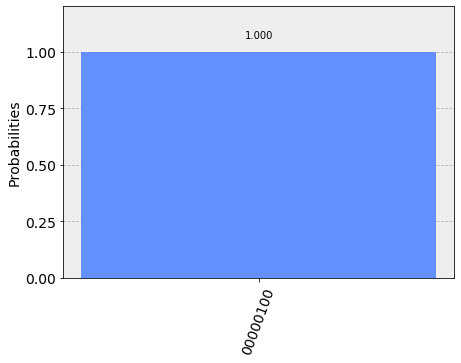

In [21]:
visualization.plot_histogram(counts)

## Passo Otimização dos pesos da Rede

Utilizaremos o algoritmo de Grover para amplificar a amplitude das saídas tendo como objetivo fazer uma modificação nos peses, desse modo devemos aplicar uma porta hadamard em todos os pesos e rodar o algoritmo de Grover que busca que a saída seja um array de bits [1 1 1 1 1 1 1 1]. Depois do processo de busca realizado é feito uma medição em todos os qubits para poder verificar o set de parâmetros que corresponde a rede treinada.

In [8]:
def createNeuralNetwork(circuit, qWI, c, qtdInputs, inputs, output):
    circuit.reset(qWI[0:4])
    circuit.reset(qWI[12:14])
    #inicializando os inputs
    for i in range(len(inputs)):
        if(inputs[i] == 1):
            circuit.x(qWI[i])
            
    # Aqui temos a implementação do primeiro perceptron com 3 entradas.
    [multiplyWeightInput(circuit, qWI[i + qtd_input + 1], qWI[i]) for i in range(0, 3)]
    activationFunction(circuit, qWI[0:4])
    circuit.cx(qWI[3], qWI[12])
    circuit.barrier()
    circuit.reset(qWI[0:4])
    
    #inicializando os inputs
    for i in range(len(inputs)):
        if(inputs[i] == 1):
            circuit.x(qWI[i])
            
    # Vejamos o segundo perceptron que também tem 3 entradas.
    [multiplyWeightInput(circuit, qWI[i + qtd_input + 4], qWI[i]) for i in range(0, 3)]
    activationFunction(circuit, qWI[0:4])
    circuit.cx(qWI[3], qWI[13])
    circuit.barrier()
    
    # modificando
    multiplyWeightInput(circuit, qWI[10], qWI[12])
    multiplyWeightInput(circuit, qWI[11], qWI[13])
    
    output = 14 + output
    
    circuit.ccx(qWI[12], qWI[13], qWI[output])
    circuit.cx(qWI[12], qWI[output])
    circuit.cx(qWI[13], qWI[output])
    circuit.barrier()
    # -----------------------------------------
    # Ver o circuit desenhado
    return circuit

### Algoritmo do Grover

O princípio do algortimo do groover é determinar uma probabilidade de um dado elemento estar dentro de um conjunto através de uma inversão de fase e uma inversão sobre a média, vejamos um exemplo:

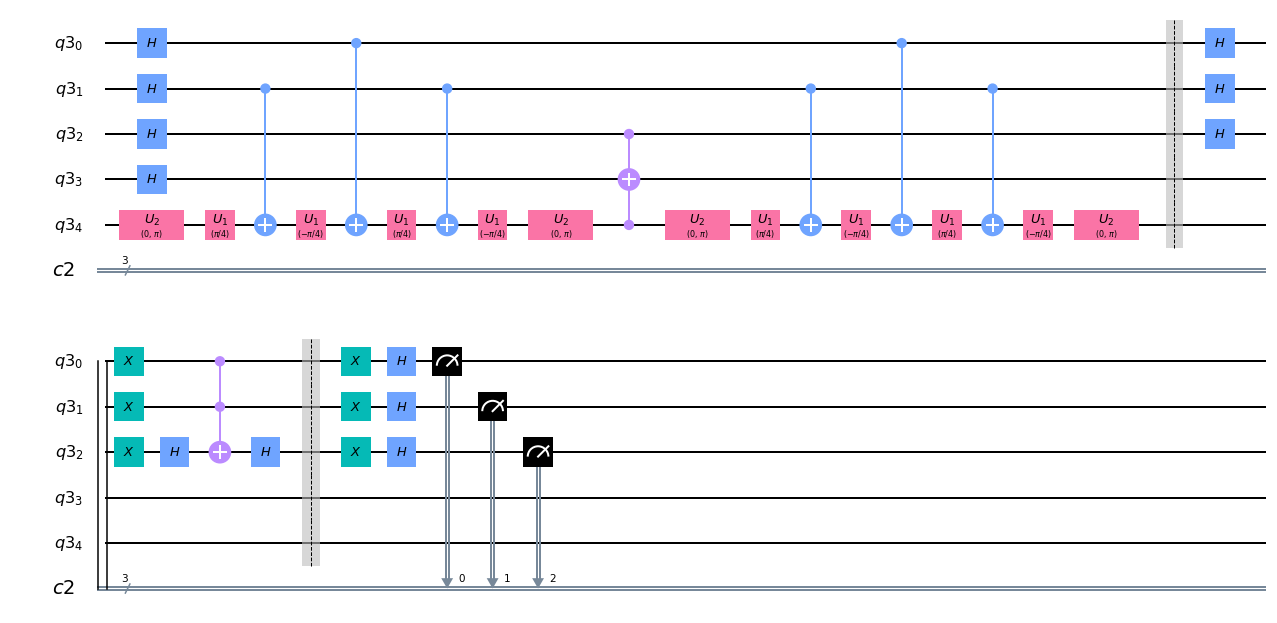

In [9]:
qRegisters = QuantumRegister(5)
cRegisters = ClassicalRegister(3)
circuitGroverExample = QuantumCircuit(qRegisters,cRegisters)
circuitGroverExample.h(qRegisters[0:4])

def grover(circuit, controls, controled, controls_amp, controls_opt, controled_opt, ancilas):   
    """.mct => necessita que a qtd de ancilas seja >= len(qubits de controle) - 2"""
    circuit.mct(controls, controled, ancilas)
    circuit.barrier()

    circuit.h(controls_amp)
    circuit.x(controls_amp)
    
    circuit.h(controled_opt)
    circuit.mct(controls_opt, controled_opt, ancilas)
    circuit.h(controled_opt)
    
    circuit.barrier()
    circuit.x(controls_amp)
    circuit.h(controls_amp)
    
for i in range(1):
    grover(
        circuitGroverExample, 
        qRegisters[0:3], 
        qRegisters[3], 
        qRegisters[0:3], 
        qRegisters[0:2],
        qRegisters[2], 
        qRegisters[4:]
    )
    
circuitGroverExample.measure(qRegisters[0:3], cRegisters[0:3])
circuitGroverExample.draw(output="mpl")

# job = qiskit.execute(circuitGroverExample, backend, shots = 1024)
# result = job.result()
# counts = result.get_counts(circuitGroverExample)
# print(counts)
# visualization.plot_histogram(counts)

### Realizando o treinamento utilizando o algoritmo do grover.

In [ ]:
allCombinations = np.unpackbits(np.arange(2**3).astype(np.uint8)[:, None], axis=1)[:, -3:]
qWI = QuantumRegister(23) 
c = ClassicalRegister(8)
neuralNetwork = QuantumCircuit(qWI, c)

for i in range(50):
    for i in range(len(allCombinations)):
        createNeuralNetwork(neuralNetwork, qWI, c, 3, allCombinations[i], i)

    neuralNetwork.reset(qWI[0:4])
    neuralNetwork.reset(qWI[12:14])
    ancilas = qWI[12:14] + qWI[0:4]
    neuralNetwork.barrier()
    neuralNetwork.x(qWI[16:18])
    neuralNetwork.x(qWI[19:22])
    neuralNetwork.barrier()
    neuralNetwork.h(qWI[14:])
    neuralNetwork.barrier()
    grover(
            neuralNetwork, 
            qWI[14:22], 
            qWI[22], 
            qWI[4:12],
            qWI[4:11],
            qWI[11],
            ancilas
        )
    neuralNetwork.barrier()
    
neuralNetwork.measure(qWI[14:22], c[:])

# neuralNetwork.draw(output="mpl")
# Aer.backends()
# [<QasmSimulator('qasm_simulator') from AerProvider()>,
#  <StatevectorSimulator('statevector_simulator') from AerProvider()>,
#  <UnitarySimulator('unitary_simulator') from AerProvider()>]
# backend = BasicAer.get_backend('statevector_simulator')

job = qiskit.execute(neuralNetwork, backend, shots = 1024)
result = job.result()
counts = result.get_counts(neuralNetwork)
print(counts)
visualization.plot_histogram(counts)

### **Limitações**

1 - Devido à inevitável questão de ser capaz apenas de simular circuitos quânticos envolvendo um pequeno número de qubits, dizem que foram forçados a se restringir a um pequeno problema construído como prova de conceito. Essa é a razão pela qual escolheram investigar uma rede neural binária tão pequena - os pesos podem ser representados usando poucos qubits. 

2 - Resaltaram várias vezes que esse método não se restringe a pesos ou parâmetros binarizados, e que métodos análogos usando representações de ponto flutuante seriam possíveis, com mais qubits, e o método funcionaria de forma idêntica, porém em nenhum momento apresentaram uma solução que se aproxime disse, se mantiveram apensar com as explicações binárias.

(Portanto, o cerne da tarefa é construir um circuito quântico que forme um análogo quântico da rede neural escolhida. Este circuito quântico deve ter os parâmetros desejados armazenados nos valores de qubits e, dado um conjunto de pesos e dados, produzir a mesma precisão que seu equivalente clássico. Qualquer parâmetro escolhido pode ser configurado para uma superposição quântica aplicando uma única porta Hadamard.)


### **Resultado**

O método mostra-se versátil e capaz de representar um cenário de meta-custo de todos os parâmetros e hiperparâmetros possíveis. Aplicando-o às conectividades e pesos de uma rede neural binária e simulando o algoritmo quântico em um computador clássico, mostramos ainda que esse "estado de paisagem" pode ser usado para treinar e meta-treinar a rede neural binária para um pequeno problema simples usando amplitude quântica amplificação, um algoritmo quântico padrão.

### **Possibilidade de Melhoria**

O artigo faz uso de simuladores para rodar o algoritmo quântico, podemos fazê-lo roda em um computador quântico da IBM para podermos verificar se o resultado quando rodamos fora do ambiente simulado é o mesmo, e se é aplicável caso seja diferente.

Tentar também criar uma prova de conceito para redes não binárias. 